In [3]:
import pandas as pd
import numpy as np
import nltk
import keras
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
import tensorflow as tf

In [5]:
os.path.join('train.csv')

'train.csv'

In [6]:
df = pd.read_csv(os.path.join('train.csv'))

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [11]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [13]:
from tensorflow.keras.layers import TextVectorization

In [14]:
TextVectorization??

In [16]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [17]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [18]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [20]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [21]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [22]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [24]:
#number of words in the vocab
MAX_FEATURES = 200000

In [25]:
vectorizer = TextVectorization(max_tokens= MAX_FEATURES, output_sequence_length=1800, output_mode='int')

In [26]:
vectorizer.adapt(X.values)

In [27]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [28]:
vectorized_text = vectorizer(X.values)

In [29]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [30]:
dataset= tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(1600000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [33]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [34]:
batch_X

array([[   171, 118812,    312, ...,      0,      0,      0],
       [    73,     88,      7, ...,      0,      0,      0],
       [     8,     19,    313, ...,      0,      0,      0],
       ...,
       [   166,    166,      8, ...,      0,      0,      0],
       [   185,      3,    549, ...,      0,      0,      0],
       [     6,    408,      4, ...,      0,      0,      0]], dtype=int64)

In [35]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [39]:
int(len(dataset)*.7)

6981

In [40]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [41]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [47]:

len(val)

1994

In [48]:
train_generator = train.as_numpy_iterator()

In [49]:
train_generator.next()

(array([[ 3833,  9274,  5061, ...,     0,     0,     0],
        [    2,    79,   250, ...,     0,     0,     0],
        [   12,    47,   667, ...,     0,     0,     0],
        ...,
        [ 2064,   463,    11, ...,     0,     0,     0],
        [    6,  1463,  4549, ...,     0,     0,     0],
        [ 1122,     2, 36152, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

CREATE SEQUIENTIAL MODEL

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [56]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [57]:
y.shape

(159571, 6)

In [58]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [62]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 5374s 770ms/step - loss: 0.0592 - val_loss: 0.0443


In [64]:
history.history

{'loss': [0.05922194570302963], 'val_loss': [0.04425431042909622]}

In [65]:
import matplotlib.pyplot as plt

<Figure size 576x360 with 0 Axes>

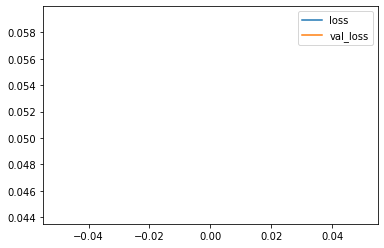

In [66]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [67]:
input_text = vectorizer('You freaking suck!')

In [69]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0], dtype=int64)>

In [68]:
batch = test.as_numpy_iterator().next()

In [70]:
res= model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 2s 2s/step


In [71]:
res

array([[0.9899826 , 0.23850791, 0.9049238 , 0.04037985, 0.79189837,
        0.16278967]], dtype=float32)

In [72]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [75]:
batch_X , batch_y = test.as_numpy_iterator().next()

In [80]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 307ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [81]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [84]:
pre= Precision()
re= Recall()

In [86]:
acc= CategoricalAccuracy()

In [87]:
for batch in test.as_numpy_iterator(): 
    X_true, y_true = batch
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 374ms/step


1/1 [==============================] - 0s 396ms/step


1/1 [==============================] - 0s 275ms/step


1/1 [==============================] - 0s 264ms/step


1/1 [==============================] - 0s 259ms/step


1/1 [==============================] - 0s 259ms/step


1/1 [==============================] - 0s 309ms/step


In [88]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8257302045822144, Recall:0.697532594203949, Accuracy:0.4704112410545349


In [89]:
pip install gradio jinja2

Note: you may need to restart the kernel to use updated packages.Collecting gradio



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.1.3 which is incompatible.


  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5595 sha256=76f2d98954f543c08d4e43ad97072095b4f975b3abdd2d276db659044c0901df
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\1f\f1\8d\367922b023b526b7c2ced5db30932def7b18cf39d7ac6e8572
Successfully built ffmpy
  Attempting uninstall: anyio
    Found existing installation: anyio 2.2.0
    Uninstalling anyio-2.2.0:
      Successfully uninstalled anyio-2.2.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1


In [94]:
import tensorflow as tf
import gradio as gr

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (C:\Users\LENOVO\anaconda3\lib\site-packages\markupsafe\__init__.py)

In [95]:
model.save('toxicity.h5')

C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
model = tf.keras.models.load_model('toxicity.h5')

In [97]:
input_str = vectorizer('hey i freaken hate you!')

In [98]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 2s 2s/step


In [93]:
pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\LENOVO\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [99]:
res

array([[0.76202095, 0.02394981, 0.39730495, 0.03103113, 0.4004443 ,
        0.09350776]], dtype=float32)

In [100]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [101]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

NameError: name 'gr' is not defined

In [ ]:
interface.launch(share=True)